In [ ]:
# Date Functionality in Pandas
import pandas as pd
import numpy as np


## Timestamp

In [10]:
import pandas as pd
import numpy as np
pd.Timestamp('Sep 1st,2016 10:25') == pd.Timestamp('2016-09-01 10:25am')

True

## Period

In [13]:
pd.Period('01/2016')


Period('2016-01', 'M')

In [14]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [15]:
# we could also use the datetime as indexes of a dataframe
df = pd.Series(list('ABC'),[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-09-03')])

2016-09-01    A
2016-09-02    B
2016-09-03    C
dtype: object

In [17]:
# check the type of the index
df = pd.Series(list('ABC'),[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-09-03')])
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [20]:
# we could also use periodindex
df1 = pd.Series(list('DEF'),index = [pd.Period('08/01/2016'),pd.Period('08/02/2016'),pd.Period('08/03/2016')])
df1

2016-08-01    D
2016-08-02    E
2016-08-03    F
Freq: D, dtype: object

In [22]:
#check the type of the index
type(df1.index)

pandas.core.indexes.period.PeriodIndex

## Converting to Datetime

In [24]:
import numpy as np
d1 = ['2 June 2013','Aug 29, 2014','2015-06-27','7/12/16']
# randomly select a 4*2 matrix from integers between 0 and 100, set the index as the date in d1
# let A, B be the column names respectively
df2 = pd.DataFrame(np.random.randint(0,100,(4,2)),index = d1,columns = list('AB'))
df2

,A,B
2 June 2013,36,2
"Aug 29, 2014",90,49
2015-06-27,69,91
7/12/16,22,16


In [25]:
# we could use a function called 'pd.to_datetime' to convert the datetime into a regular datetime format
# it will convert the datetime to yyyy-mm--dd
df2.index = pd.to_datetime(d1)
df2

,A,B
2013-06-02,36,2
2014-08-29,90,49
2015-06-27,69,91
2016-07-12,22,16


## Timedeltas

In [26]:
# timedeltas gives us a time difference, its type is timedeltas, it could be used in numerical calculations
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [29]:
# create a timedeltas
delta = pd.Timedelta('12D 3H')
time = pd.Timestamp('9/20/2016 4:00am') + delta
# push forward 12 days and 3 hours from the original timestamp
time

Timestamp('2016-10-02 07:00:00')

## Working with Dates in a Dataframe

In [32]:
import numpy as np
dates = pd.date_range(start = '09/01/2016',periods = 9, freq = '2W')
df = pd.DataFrame({'Count1': 100 + np.random.randint(-5,10,9).cumsum(),
                   'Count2': 120 + np.random.randint(-5,10,9)}, index = dates)
df

,Count1,Count2
2016-09-04,96,125
2016-09-18,103,124
2016-10-02,110,123
2016-10-16,111,128
2016-10-30,110,118
2016-11-13,105,122
2016-11-27,110,121
2016-12-11,111,125
2016-12-25,112,128


In [34]:
# df.diff() function will gives back the difference of a previous record and a latter record 
# within a same column

df.diff()

,Count1,Count2
2016-09-04,NaN,NaN
2016-09-18,7.0,-1.0
2016-10-02,7.0,-1.0
2016-10-16,1.0,5.0
2016-10-30,-1.0,-10.0
2016-11-13,-5.0,4.0
2016-11-27,5.0,-1.0
2016-12-11,1.0,4.0
2016-12-25,1.0,3.0


In [38]:
# we could using some indexing like
df['2016-12']
# this will actually gives us all the data with the index that contains '2016-12'

,Count1,Count2
2016-12-11,111,125
2016-12-25,112,128


In [39]:
df['2016']

,Count1,Count2
2016-09-04,96,125
2016-09-18,103,124
2016-10-02,110,123
2016-10-16,111,128
2016-10-30,110,118
2016-11-13,105,122
2016-11-27,110,121
2016-12-11,111,125
2016-12-25,112,128


In [40]:
# df.asfreq will reassign the freq of the datetime indexes
df.asfreq('W', method = 'ffill')

,Count1,Count2
2016-09-04,96,125
2016-09-11,96,125
2016-09-18,103,124
2016-09-25,103,124
2016-10-02,110,123
2016-10-09,110,123
2016-10-16,111,128
2016-10-23,111,128
2016-10-30,110,118
2016-11-06,110,118


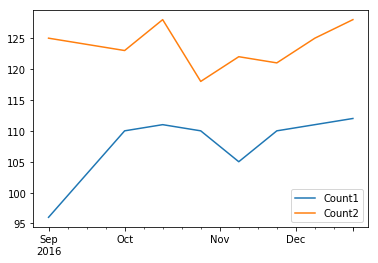

In [42]:
# using matplotlib中的 pylot to plot the dataframe
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()